# Correlation
In this Notebook, we'll be looking at _correlation_. Simply put, "correlation" is how much two (quantitative) variables "move together". Let's use a data set with [YouTube statistics from the top 5000 channels](https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade). It includes data on subscribers, views and uploads.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt #Useful to include matplotlib when plotting with Seaborn, because Seaborn is built on it.

In [2]:
df = pd.read_csv('youtube.csv')
df.head()

,name,uploads,subscribers,views
0,AP Archive,422326,746325,548619569
1,YTN NEWS,355996,820108,1640347646
2,SBS Drama,335521,1418619,1565758044
3,GMA News,269065,2599175,2786949164
4,MLB,267649,1434206,1329206392


One extremely useful way to get an overview of a data set with multiple quantitative variables is a so-called "scatterplot matrix". A scatterplot is a graph with points for each combination of X-Y values. A scatterplot matrix combines multiple such graphs in one visualization.

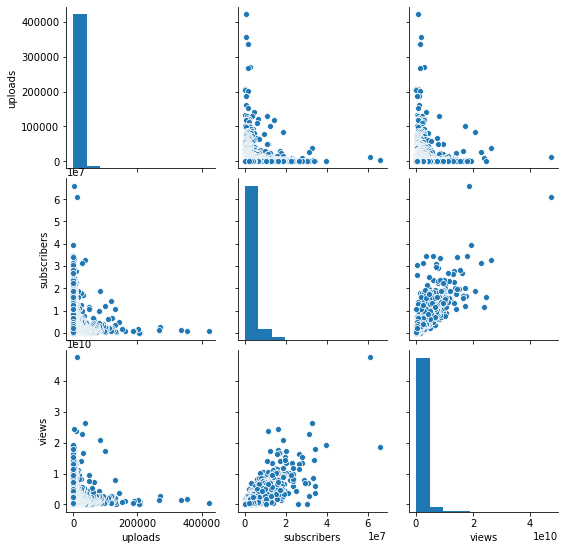

In [4]:
sns.pairplot(df)
plt.show() #using Matplotlib to show the plot

There are a few things to note here:
* 1e7 = 10^7 = 10 to the power of 7 = 10x10x10x10x10x10x10 = 10000000, 10 million. So what is 1e10?
* Seaborn shows histograms on the diagonal axis and scatterplots on all other points in the matrix.
* All distributions are right-skewed; they have a tail on the right.
* There are positive correlations between subscribers and views (makes sense, right?).
* There is kind of an unclear, "inversely proportial" relation between uploads and views. It's not clear if there even is a relation. It seems strange for a channel to have so many uploads (>10000). Presumably these are some speciality channels that use some kind of automatic uploading.

Let's zoom in on the relation between subscribers and views. Let's first plot the relation. We'll plot subscribers on the x-asis, because subscribers are more likely to be the cause of views, than vice versa. That is, subscribers is our _independent_ variable, views our _dependent variable_.

The big numbers are kind of hard to work with. Let's divide the subscribers and views by a million to get "millions of subscribers" and "millions of views".

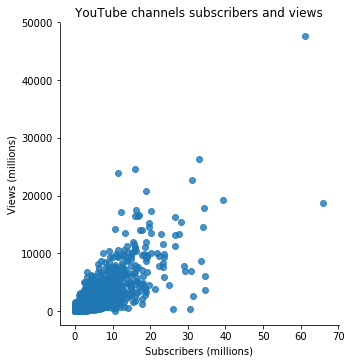

In [5]:
df['subscribers_m'] = df['subscribers'] / 1000000 #get subscribers in millions
df['views_m'] = df['views'] / 1000000 #get views in millions

sns.lmplot(x='subscribers_m', y='views_m', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Subscribers (millions)') #use matplotlib to refine Seaborn plot
plt.ylabel('Views (millions)')
plt.title('YouTube channels subscribers and views')
plt.show()

The relation is somewhat _linear_: the points lie around a virtual line. However, the distance from the line (the variation) seems to increase with bigger numbers of subscribers.

Let's calculate the correlation, Pearson's _r_. Remember that correlation is a number between -1 and 1 that shows how much the variables 'go together'.

In [6]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df['subscribers'],df['views']))
print(pearsonr(df['subscribers'],df['uploads']))

(0.7912411514219986, 0.0)
(0.011362046412882854, 0.44055026696194066)


The output gives us two numbers: _r_ which is 0.79, and _p_ which appears to be 0, but which is actually just really small. We can conclude the following:

* Subscribers and views are strongly correlated (_r_ = 0.79)
* The correlation is highly significant (_p_ < 0.001)

We can also calculate all the correlations and make a correlation matrix by using the Pandas *corr()* method for dataframes.

In [14]:
corr = df[['uploads', 'subscribers', 'views']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,uploads,subscribers,views
uploads,1.000000,0.011362,0.087830
subscribers,0.011362,1.000000,0.791241
views,0.087830,0.791241,1.000000


We can also visualize this correlation in a heatmap using the Seaborn *heatmap* function.

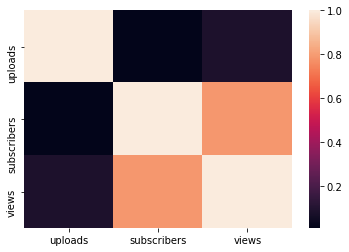

In [16]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()